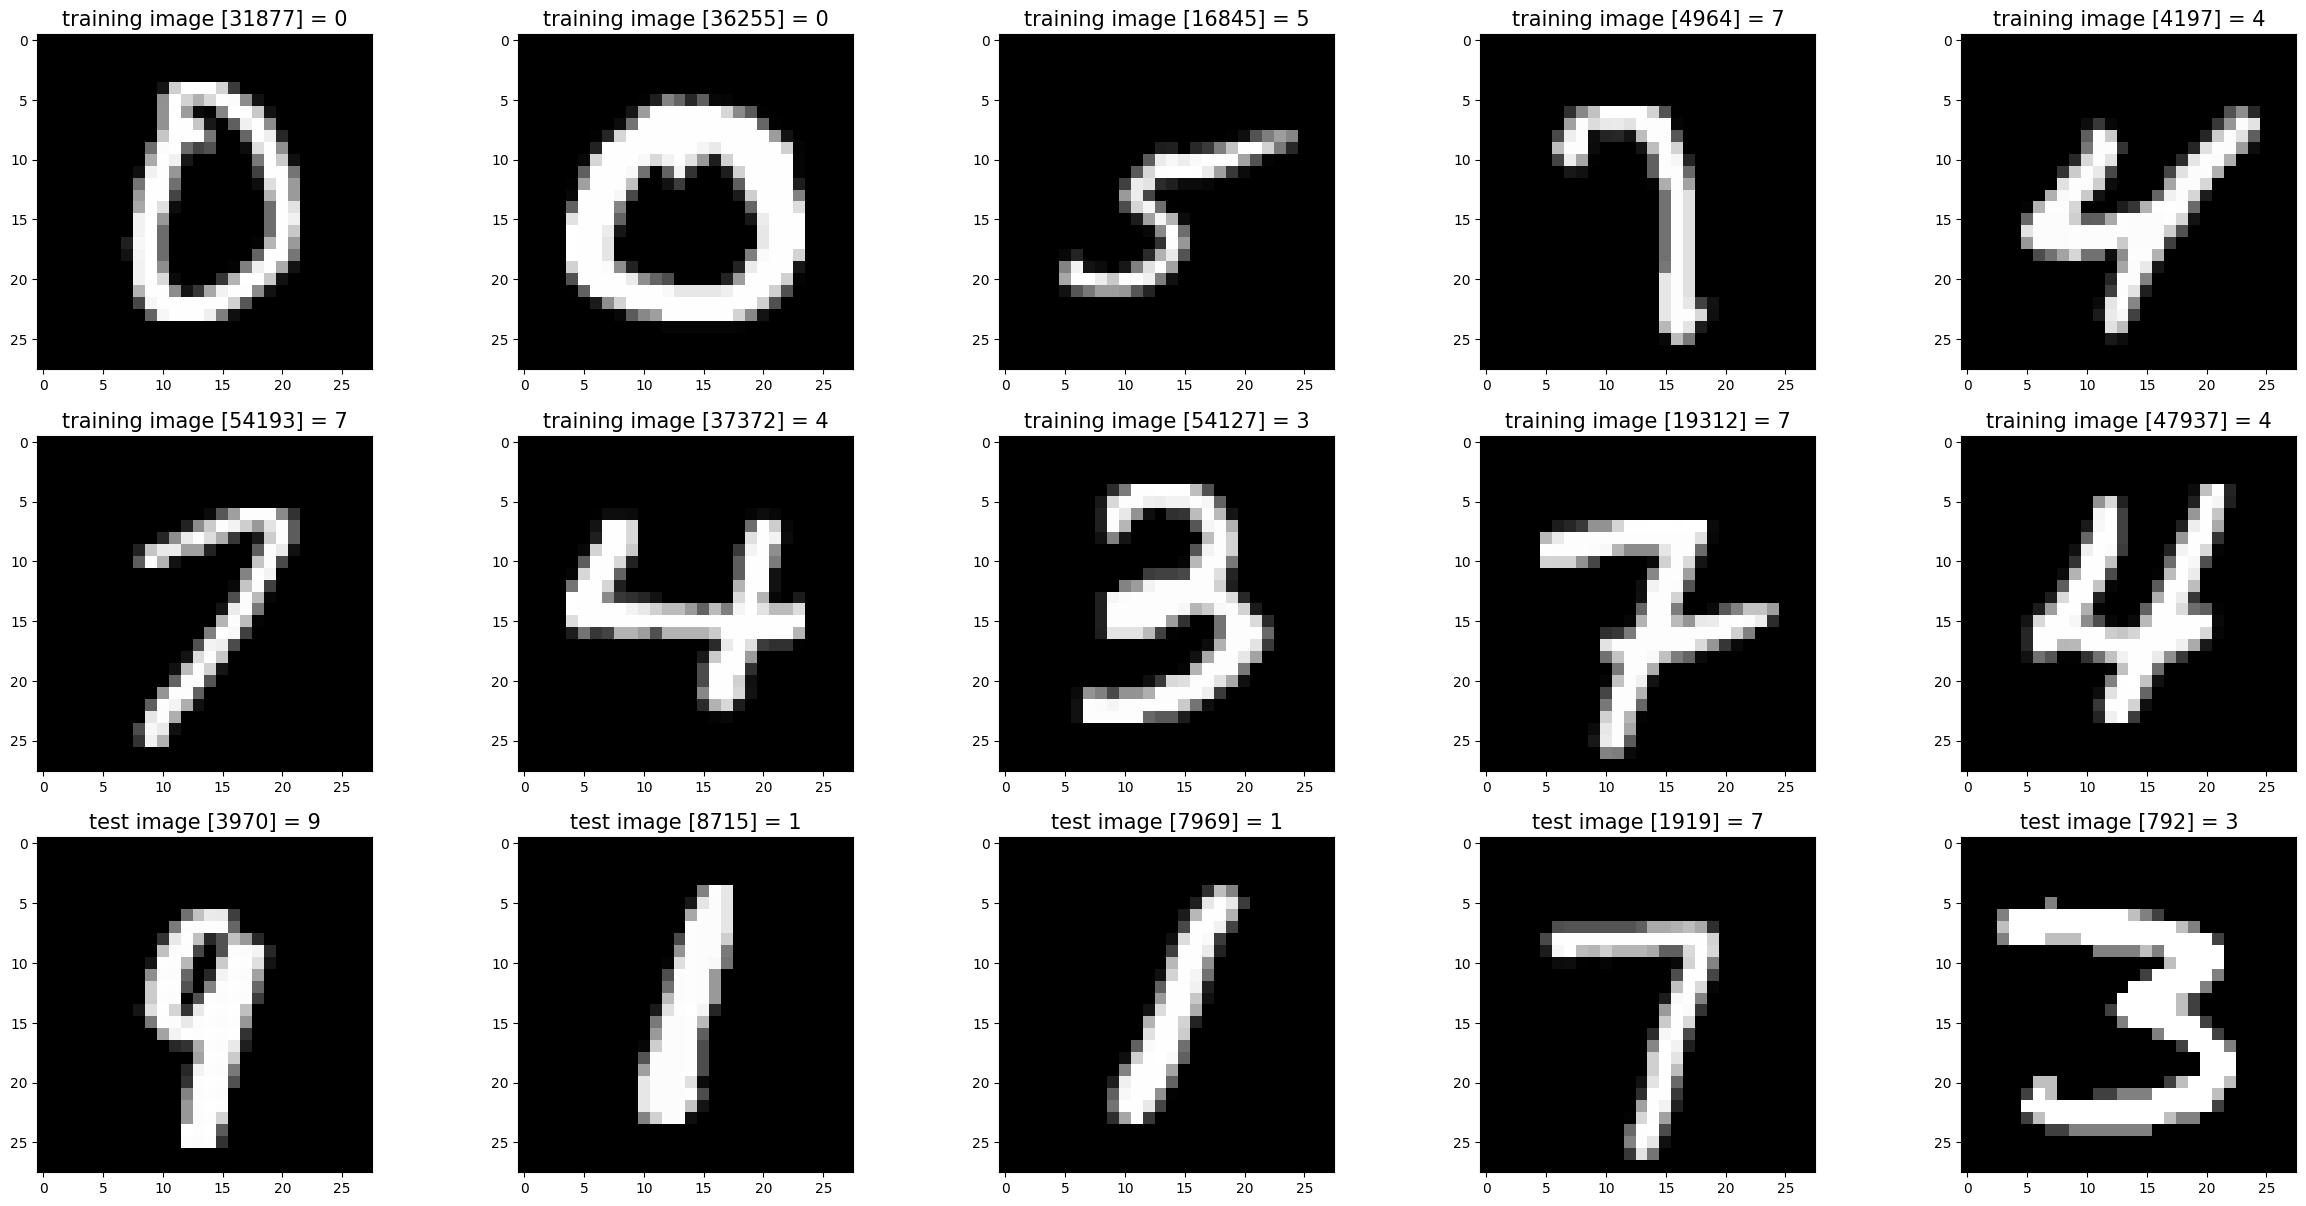

In [ ]:
#not my code, source : https://www.kaggle.com/code/hojjatk/read-mnist-dataset
# I did some minor modifications

import numpy as np # linear algebra
import struct
from array import array
from os.path import join
import os
import random
import matplotlib.pyplot as plt

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())

        images = [np.array(image_data[i * rows * cols:(i + 1) * rows * cols]).reshape(28, 28) for i in range(size)]
        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

#
# Set file paths based on MNIST dataset location
#
input_path = "./archive"

training_images_filepath = join(input_path, "train-images.idx3-ubyte")
training_labels_filepath = join(input_path, "train-labels.idx1-ubyte")
test_images_filepath = join(input_path, "t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels.idx1-ubyte")

# Check if files exist before proceeding
for filepath in [training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath]:
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

#
# Load MNIST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = (len(images) // cols) + 1
    plt.figure(figsize=(30, 20))
    for index, (image, title_text) in enumerate(zip(images, title_texts), start=1):
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if title_text:
            plt.title(title_text, fontsize=15)
    plt.show()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []

for _ in range(10):
    r = random.randint(0, 59999)
    images_2_show.append(x_train[r])
    titles_2_show.append(f'training image [{r}] = {y_train[r]}')

for _ in range(5):
    r = random.randint(0, 9999)
    images_2_show.append(x_test[r])
    titles_2_show.append(f'test image [{r}] = {y_test[r]}')

show_images(images_2_show, titles_2_show)


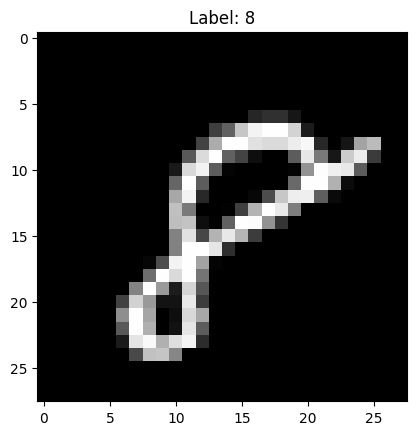

Predicted label: 7


In [ ]:
import numpy as np  # linear algebra
import struct
from array import array
from os.path import join
import os
import random
import matplotlib.pyplot as plt

# not my code, source: https://www.kaggle.com/code/hojjatk/read-mnist-dataset
# I did some minor modifications
#
# ---! Start of code from Kaggle source !---
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())

        images = [np.array(image_data[i * rows * cols:(i + 1) * rows * cols]).reshape(28, 28) for i in range(size)]
        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)



#
# Set file paths based on MNIST dataset location
#
input_path = "./archive"

training_images_filepath = join(input_path, "train-images.idx3-ubyte")
training_labels_filepath = join(input_path, "train-labels.idx1-ubyte")
test_images_filepath = join(input_path, "t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels.idx1-ubyte")

# Check if files exist before proceeding
for filepath in [training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath]:
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

#
# Load MNIST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = (len(images) // cols) + 1
    plt.figure(figsize=(30, 20))
    for index, (image, title_text) in enumerate(zip(images, title_texts), start=1):
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if title_text:
            plt.title(title_text, fontsize=15)
    plt.show()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []

for _ in range(10):
    r = random.randint(0, 59999)
    images_2_show.append(x_train[r])
    titles_2_show.append(f'training image [{r}] = {y_train[r]}')

for _ in range(5):
    r = random.randint(0, 9999)
    images_2_show.append(x_test[r])
    titles_2_show.append(f'test image [{r}] = {y_test[r]}')

#show_images(images_2_show, titles_2_show)

# ---! End of code from Kaggle source !---
# Helper functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def format_output_probabilities(output):
    percentages = output * 100  
    predicted_number = np.argmax(output, axis=1)[0]
    
    print("\nNumber Probabilities (%):")
    for number, percentage in enumerate(percentages[0]):
        print(f"Number {number}: {percentage:.2f}%")
    
    print(f"\nPredicted Number: {predicted_number}")

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)] + 1e-9)
    return np.sum(log_likelihood) / m

# Neural Network Class 
class NeuralNetwork:
    def __init__(self, input_size=784, hidden_layers=[512, 512], output_size=10):
        np.random.seed(0)  # Set seed
        
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.weights = []
        self.biases = []

        # Input to first hidden layer
        self.weights.append(0.01 * np.random.randn(input_size, hidden_layers[0]))
        self.biases.append(np.zeros((1, hidden_layers[0])))

        # Hidden layers
        for i in range(len(hidden_layers) - 1):
            self.weights.append(0.01 * np.random.randn(hidden_layers[i], hidden_layers[i + 1]))
            self.biases.append(np.zeros((1, hidden_layers[i + 1])))

        # Last hidden layer to output
        self.weights.append(0.01 * np.random.randn(hidden_layers[-1], output_size))
        self.biases.append(np.zeros((1, output_size)))

    def forward(self, inputs):
        self.layers = [inputs]
        
        for i in range(len(self.weights)):
            z = np.dot(self.layers[-1], self.weights[i]) + self.biases[i]
            if i == len(self.weights) - 1:
                a = softmax(z)  # Output layer
            else:
                a = relu(z)  # Hidden layers
            self.layers.append(a)

        return self.layers[-1]

    def backpropagate(self, inputs, labels, learning_rate=0.01):
        outputs = self.forward(inputs)
        loss = cross_entropy_loss(labels, outputs)

        dL_dOut = outputs - labels
        gradients_weights = []
        gradients_biases = []

        for i in reversed(range(len(self.weights))):
            dW = np.dot(self.layers[i].T, dL_dOut) / inputs.shape[0]
            dB = np.sum(dL_dOut, axis=0, keepdims=True) / inputs.shape[0]
            gradients_weights.insert(0, dW)
            gradients_biases.insert(0, dB)

            if i > 0:
                dL_dOut = np.dot(dL_dOut, self.weights[i].T) * relu_derivative(self.layers[i])

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * gradients_weights[i]
            self.biases[i] -= learning_rate * gradients_biases[i]

        return loss

    def learning_rate_schedule(self, initial_lr, epoch, decay_rate=0.01):
        return initial_lr * np.exp(-decay_rate * epoch)
    
if __name__ == "__main__":
    input_size = 784
    hidden_layers = [512, 512]
    output_size = 10

    nn = NeuralNetwork(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size)
    
    # Select a specific image index for testing
    index = random.randint(0, 59999)  # For x_train


    # Print the image
    plt.imshow(x_train[index], cmap=plt.cm.gray)
    plt.title(f"Label: {y_train[index]}")
    plt.show()

    # Use the same image for testing
    sample_input = np.array(x_train[index]).reshape(1, 784)  # Flatten the image
    output = nn.forward(sample_input)

    # Print the predicted label
    predicted_label = np.argmax(output)
    print(f"Predicted label: {predicted_label}")

    

# # Training the model
# if __name__ == "__main__":
#     input_size = 784
#     hidden_layers = [512, 512]
#     output_size = 10

#     nn = NeuralNetwork(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size)
    
#     # testing batch
#     sample_labels = y_train[:1]
#     sample_input = np.array(x_train[:1]).reshape(1, 784)  # Convert to NumPy array and flatten

    
#     output = nn.forward(sample_input)
#     print(output)

#     # Display formatted probabilities and prediction
#     format_output_probabilities(output)


In [63]:
import numpy as np
import struct
from array import array
from os.path import join
import os

class MnistDataloader:
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch, expected 2049, got {magic}')
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch, expected 2051, got {magic}')
            image_data = array("B", file.read())

        images = [np.array(image_data[i * rows * cols:(i + 1) * rows * cols]).reshape(28, 28) for i in range(size)]
        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

# Set file paths
input_path = "./archive"
training_images_filepath = join(input_path, "train-images.idx3-ubyte")
training_labels_filepath = join(input_path, "train-labels.idx1-ubyte")
test_images_filepath = join(input_path, "t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels.idx1-ubyte")

# Check if files exist
for filepath in [training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath]:
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

# Load MNIST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


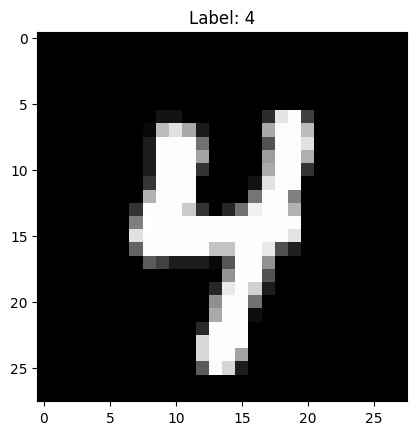

Predicted label: 0


In [62]:
if __name__ == "__main__":
    input_size = 784
    hidden_layers = [512, 512]
    output_size = 10

    nn = NeuralNetwork(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size)
    
    # Select a specific image index for testing
    index = random.randint(0, 59999)  # For x_train


    # Print the image
    plt.imshow(x_train[index], cmap=plt.cm.gray)
    plt.title(f"Label: {y_train[index]}")
    plt.show()

    # Use the same image for testing
    sample_input = np.array(x_train[index]).reshape(1, 784)  # Flatten the image
    output = nn.forward(sample_input)

    # Print the predicted label
    predicted_label = np.argmax(output)
    print(f"Predicted label: {predicted_label}")
